In [5]:
import pandas as pd

# output-ave.txtからデータを読み込む
df_all = pd.read_csv('output-ave.txt', sep='\t')



/var/folders/mf/llf661b147ggb7t1v66lwxkr0000gn/T/ipykernel_26964/3202174249.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')


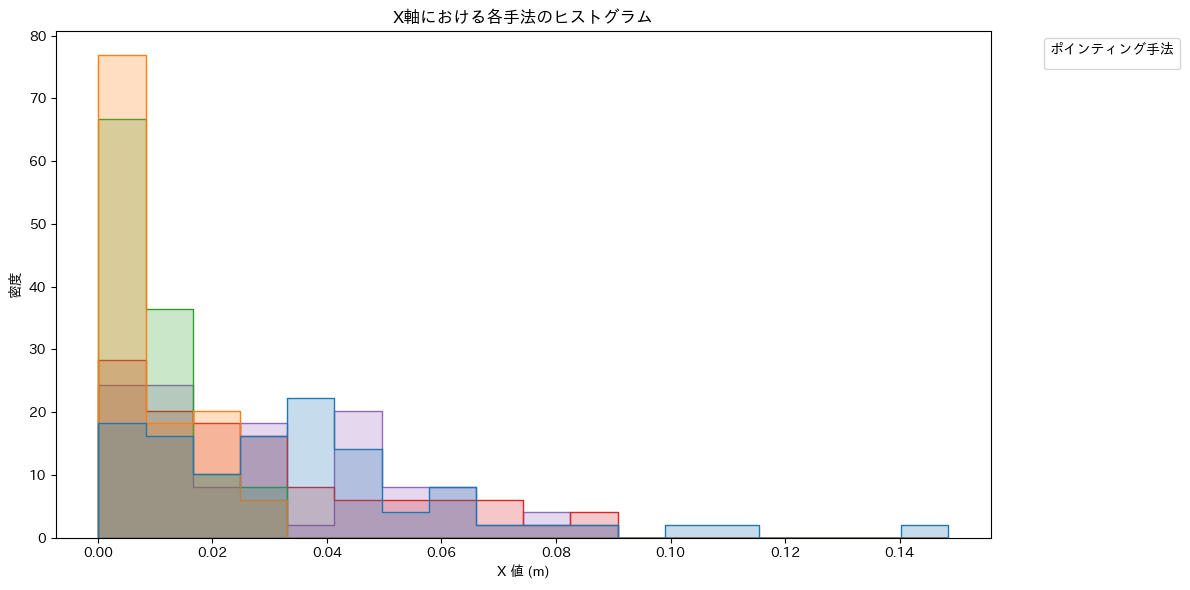

/var/folders/mf/llf661b147ggb7t1v66lwxkr0000gn/T/ipykernel_26964/3202174249.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')


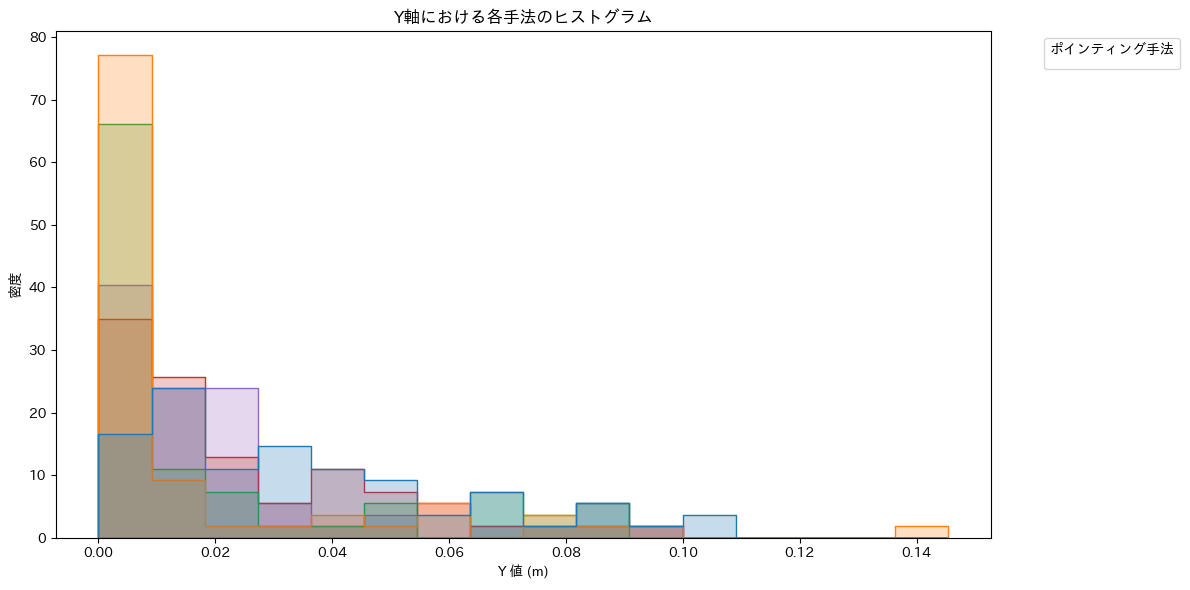

/var/folders/mf/llf661b147ggb7t1v66lwxkr0000gn/T/ipykernel_26964/3202174249.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')


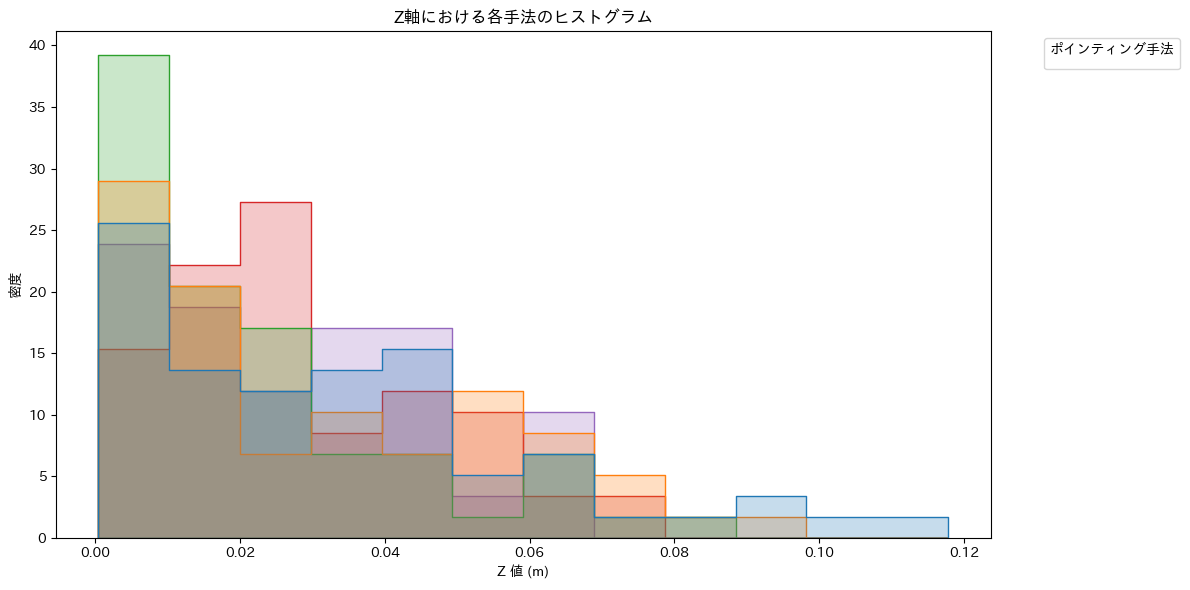

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# df_all データフレームがあると仮定

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音無し',
    0: '離散指数',
    1: '連続指数',
    2: '連続線形',
    3: '離散線形',
}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# Method_Labelの順序を指定
method_order = ['音無し', '離散指数', '連続指数', '連続線形', '離散線形']
df_all['Method_Label'] = pd.Categorical(df_all['Method_Label'], categories=method_order, ordered=True)

# 各軸および手法ごとにヒストグラムを表示
axes = ['X', 'Y', 'Z']
for axis in axes:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_all, x=axis, hue='Method_Label', element='step', stat='density', common_norm=False)
    plt.title(f'{axis}軸における各手法のヒストグラム')
    plt.xlabel(f'{axis} 値 (m)')
    plt.ylabel('密度')
    plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


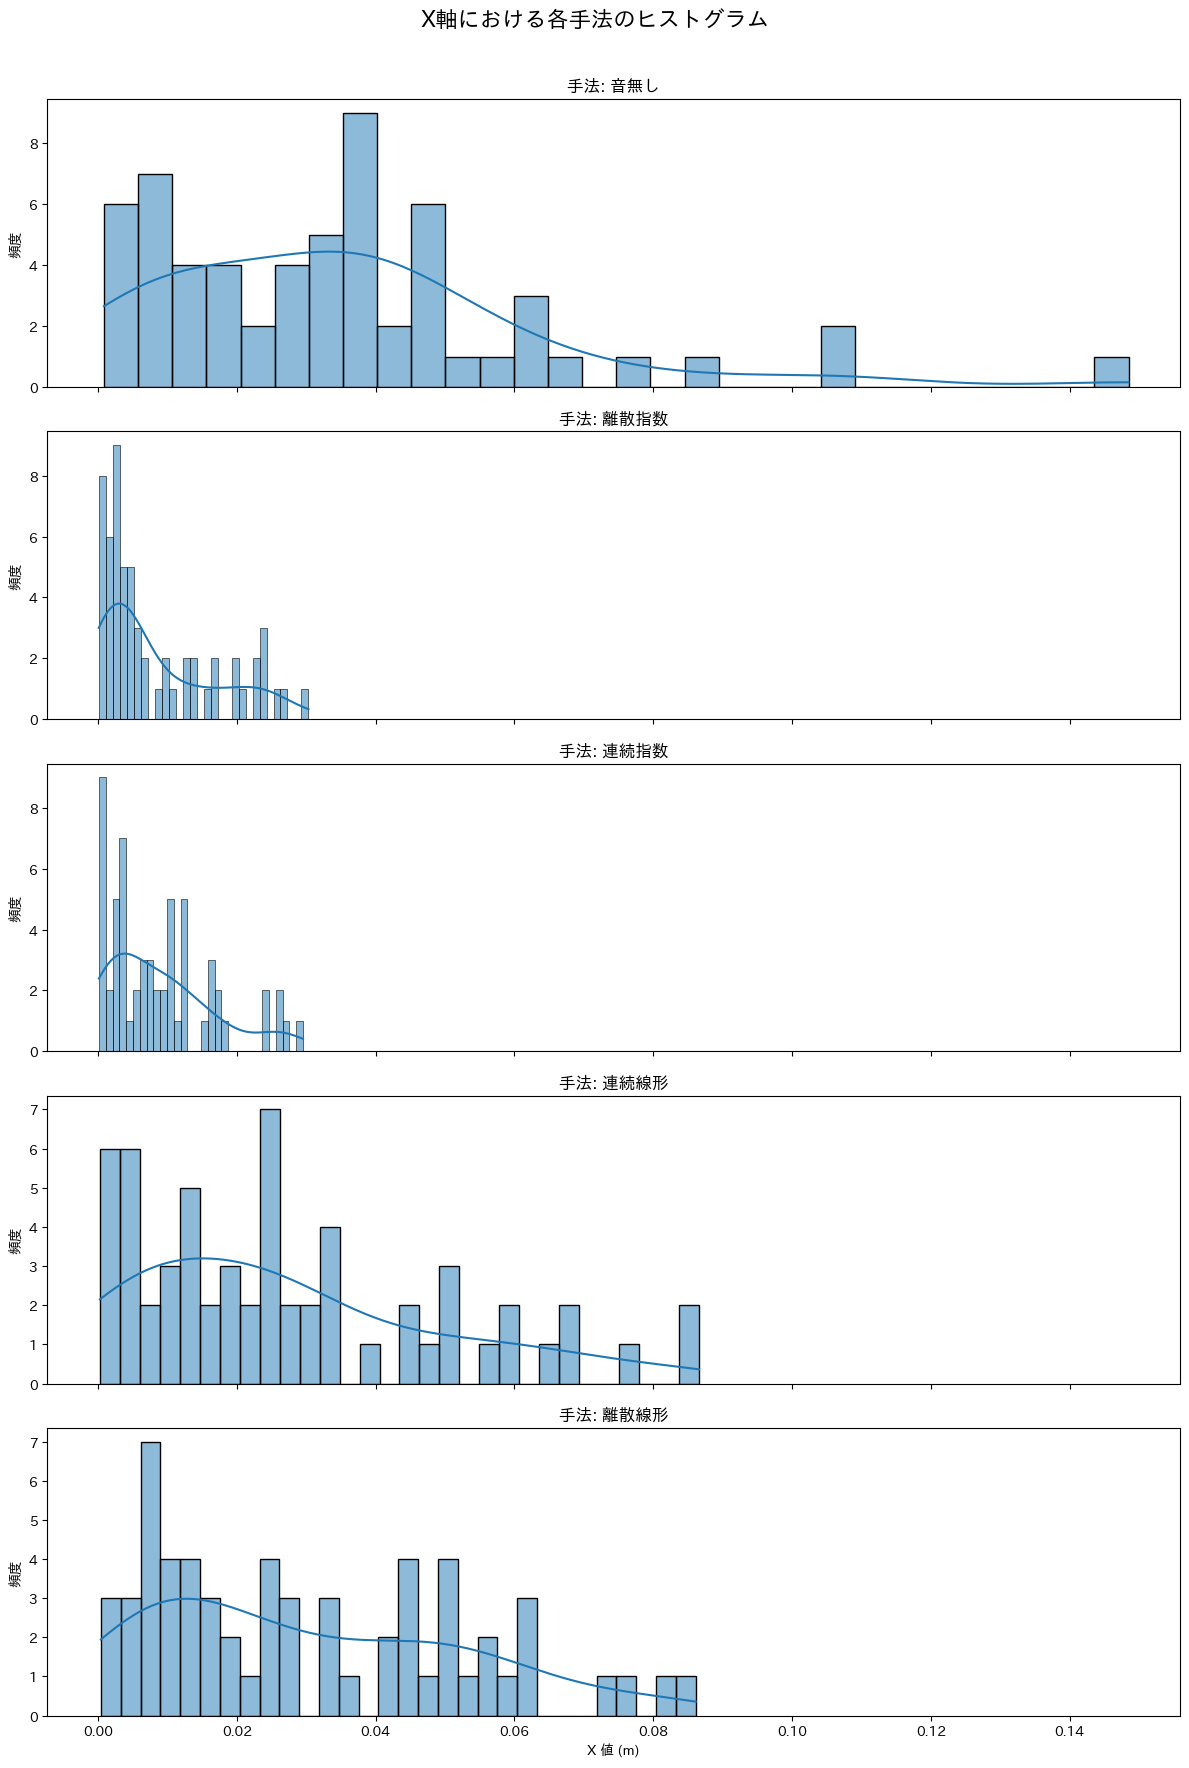

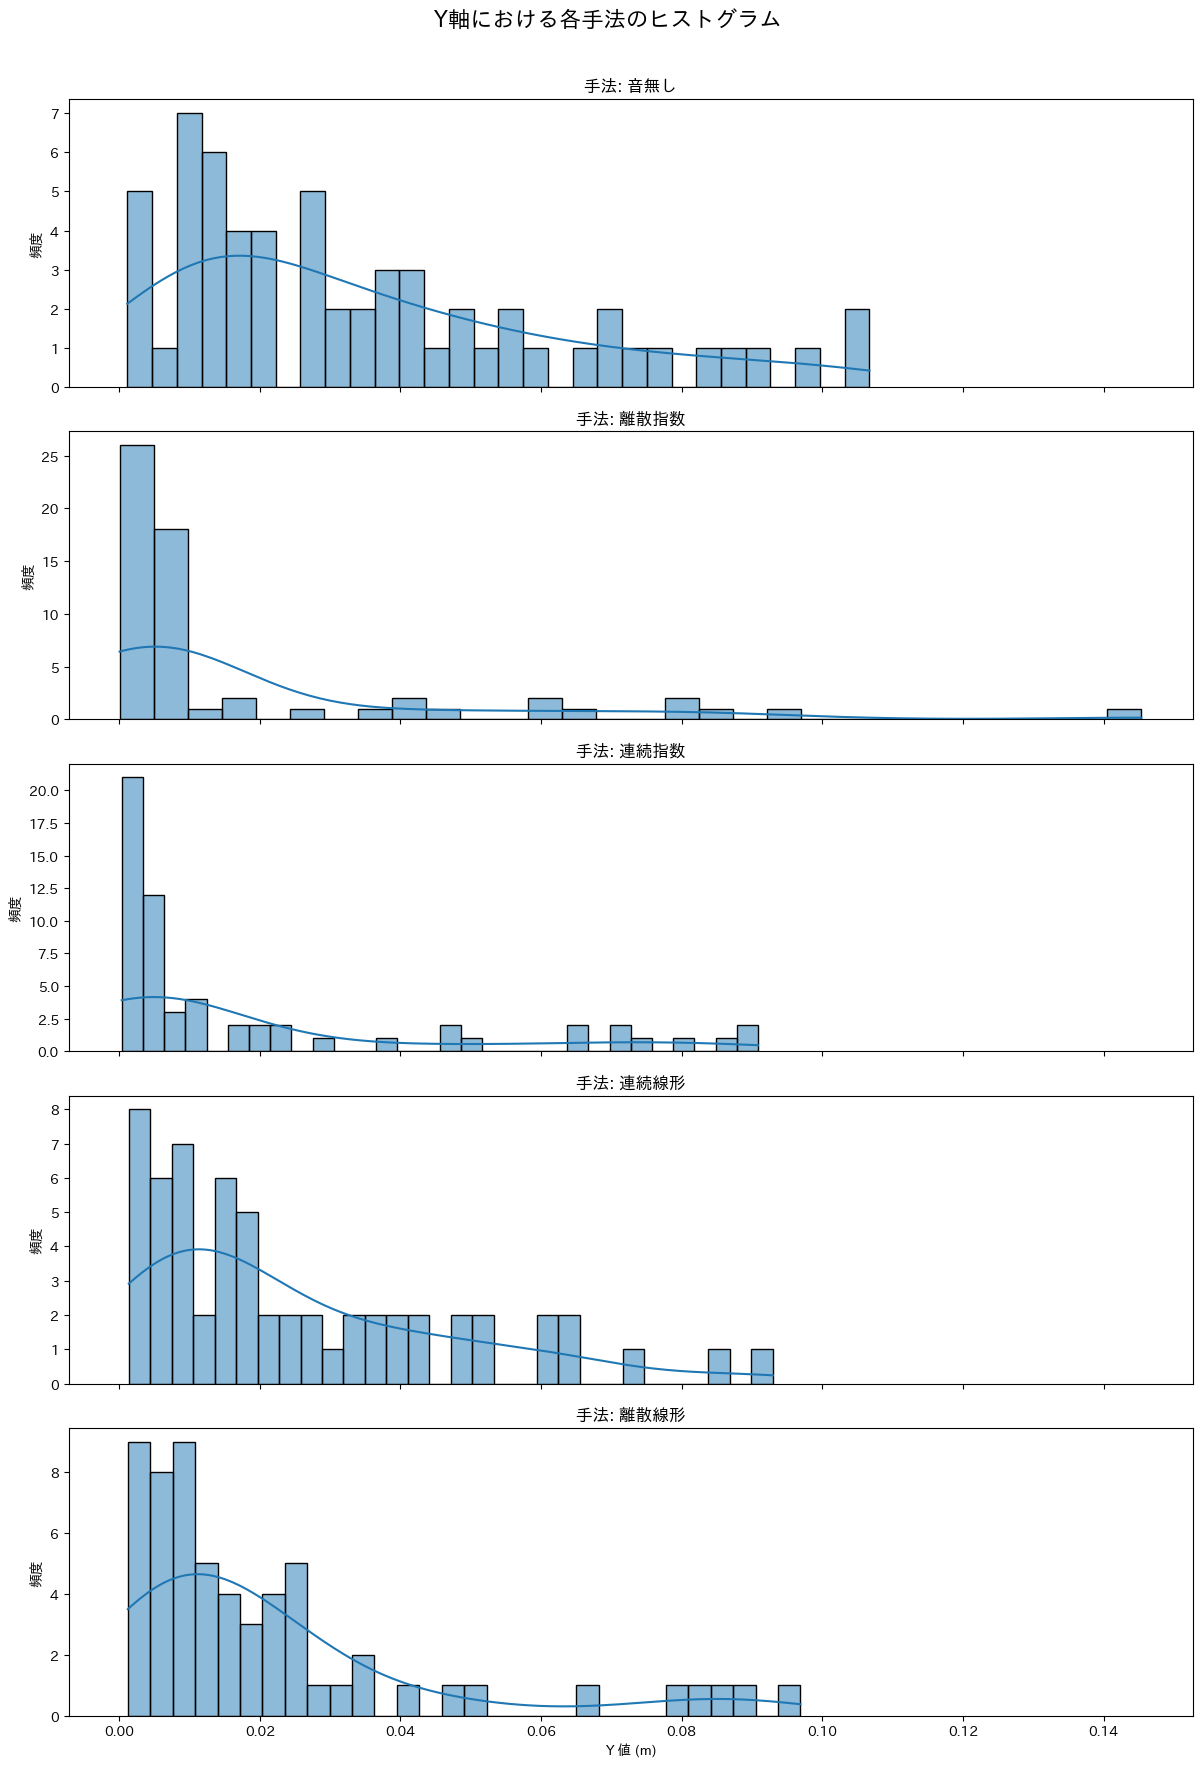

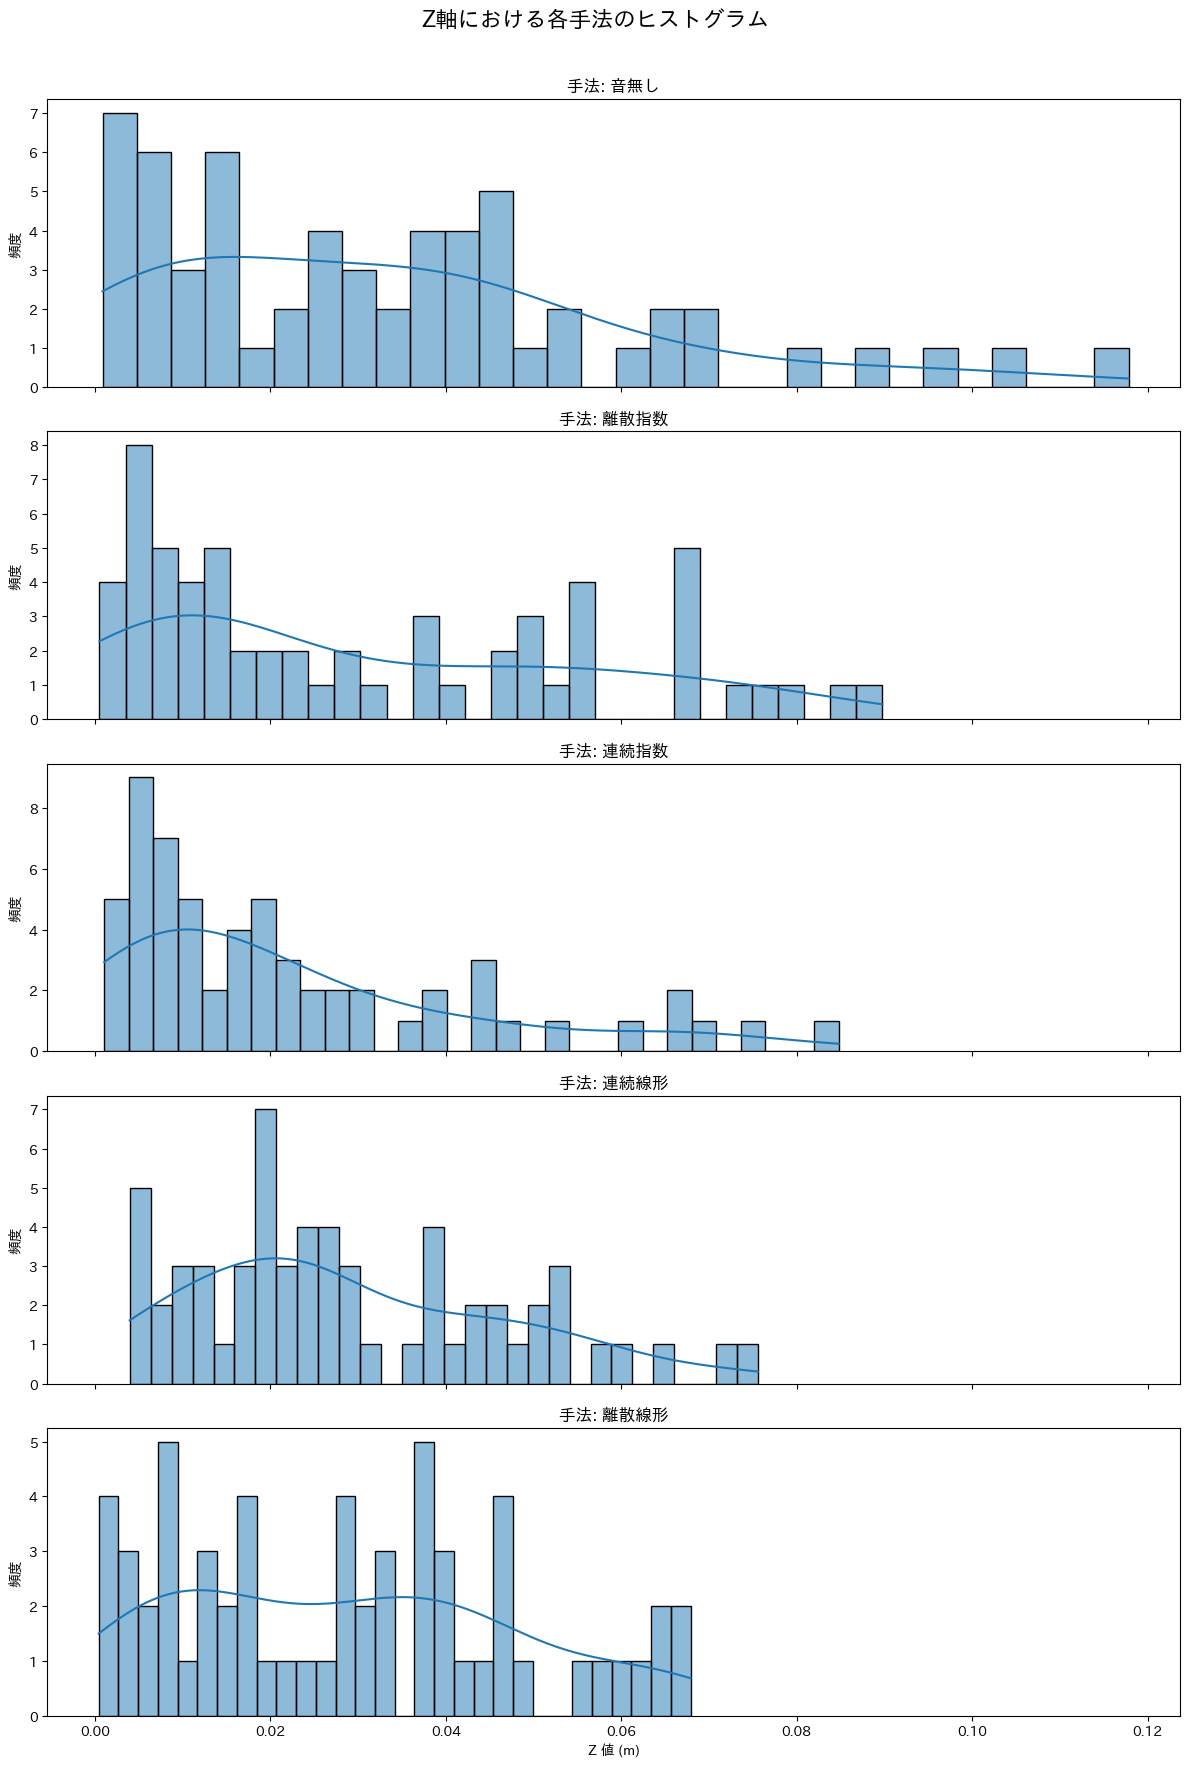

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# df_all データフレームがあると仮定

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    -1: '音無し',
    0: '離散指数',
    1: '連続指数',
    2: '連続線形',
    3: '離散線形',
}

place_labels = {
    0: '(0.25,-0.1,0)',
    1: '(0.25,0.1,0)',
    2: '(0.5,-0.1,0)',
    3: '(0.5,0.1,0)',
    4: '(0.25,-0.1,-0.1)',
    5: '(0.25,0.1,-0.1)',
    6: '(0.5,-0.1,-0.1)',
    7: '(0.5,0.1,-0.1)'
}

# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# Method_Labelの順序を指定
method_order = ['音無し', '離散指数', '連続指数', '連続線形', '離散線形']
df_all['Method_Label'] = pd.Categorical(df_all['Method_Label'], categories=method_order, ordered=True)

# 各軸および手法ごとにヒストグラムを表示
axes = ['X', 'Y', 'Z']
methods = df_all['Method_Label'].unique()

for axis in axes:
    fig, axs = plt.subplots(len(methods), 1, figsize=(12, 18), sharex=True)
    fig.suptitle(f'{axis}軸における各手法のヒストグラム', fontsize=16)
    
    for i, method in enumerate(methods):
        sns.histplot(data=df_all[df_all['Method_Label'] == method], x=axis, kde=True, ax=axs[i], bins=30)
        axs[i].set_title(f'手法: {method}')
        axs[i].set_xlabel(f'{axis} 値 (m)')
        axs[i].set_ylabel('頻度')

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # タイトルスペースを確保
    plt.show()
